# Predictng sales of Summer clothes in e-Commerce platform - Wish

Wish is an American online e-commerce platform for transactions between sellers and buyers founded in 2010.  The platform personalizes the shopping experience visually for customers rather than relying only on search bar format. It allows sellers to list their products on Wish and sell directly to consumers.

* Due to the non-tactile nature of the online products, to attract customers and promote their sales, e-commerce vendors rely more on an alternative group of presented visual and textual information such as product images and titles.


* This project identifies product listing strategies, primarily visual and textual presentation, that can help retailers to raise their product sales. The task is to *predict the number of units sold* of the products. The problem has been solved through a regression model. 


* Sales of summer clothes in E-commerce Wish - Dataset contains product listings as well as products ratings and sales performance collected from Kaggle. With this, the correlations and patterns regarding the success of a product and the various components can be studied.


## Contents

* [Importing Data](#import)
* [Data Preprocessing](#preprocess)
* [Correlation between features](#correlation)
* [Feature Selection](#selection)
* [Data Analysis](#analysis)
* [Regression Models](#regmodel)
* [GridSearchCV](#gridsearch)
* [Final Model](#finalmodel)
* [Prediction Testing](#testing)

<a id='import'></a>

## Importing Data

In [1]:
# Basic 
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
sales.head(1)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08


<a id='preprocess'></a>

## Data Preprocessing

* Data Preprocessing is a key step to making models that can predict/classify depending on the dataset and the question aim to be answered. 


* At some level, this requires to be aware of the background of data and the question to be answered. 


* Below are a few steps that are used at the Data Preprocessing stage. 

1. [Removing the null values](#1)
2. [Transform categorical variables](#2)
3. [Removing the features that have 1 unique value](#3)
4. [Engineer new feature](#4) 
5. [Remove unnecessary features](#5)

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

<a id='1'></a>

### Removing the null values

In [4]:
sales.isnull().sum()[sales.isnull().sum() !=0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [5]:
# Rating-count features with null values are replaced with 0 since the value could be null (for that rating) because no
# customer rated it

sales['rating_five_count'].replace(np.nan, 0, inplace=True)
sales['rating_four_count'].replace(np.nan, 0, inplace=True)
sales['rating_three_count'].replace(np.nan, 0, inplace=True)
sales['rating_two_count'].replace(np.nan, 0, inplace=True)
sales['rating_one_count'].replace(np.nan, 0, inplace=True)

# 'has_urgency_banner' feature tells us whether or not the product has an urgency banner. 
# Therefore, this feature becomes a categorical variable:
# 1 denoting it has an urgency text
# 0 denoting it does not have an urgency text

sales['has_urgency_banner'].replace(np.nan, 0, inplace=True)

<a id='2'></a>

### Transform categorical variables

In [6]:
sales.dtypes[sales.dtypes == 'object']

title                        object
title_orig                   object
currency_buyer               object
tags                         object
product_color                object
product_variation_size_id    object
shipping_option_name         object
urgency_text                 object
origin_country               object
merchant_title               object
merchant_name                object
merchant_info_subtitle       object
merchant_id                  object
merchant_profile_picture     object
product_url                  object
product_picture              object
product_id                   object
theme                        object
crawl_month                  object
dtype: object

#### 1. Product Color

* 'product_color', 'product_variation_size_id' and 'origin_country' will be used in this category to reduce the number of categories in each feature


* segregate different colors into basic colors - 'black', 'white', 'blue', 'red', 'green', 'yellow', 'pink', 'grey', 'purple', 'orange', 'brown', 'beige' are the basic colors opted


* replaced np.nan with 'others'


* adding a category 'dual' for products that have two colors


* adding a category 'others' for products that are multi-colored or have a print on them

In [7]:
count = sales['product_color'].value_counts()
count[count>3]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
rosered               8
skyblue               8
brown                 7
coffee                7
darkblue              6
floral                5
rose                  5
lightpink             4
navy                  4
leopard               4
black & green         4
fluorescentgreen      4
Name: product_color, dtype: int64

In [8]:
sales['product_color'].replace('armygreen', 'green', inplace=True)
sales['product_color'].replace('winered', 'red', inplace=True)
sales['product_color'].replace('navyblue', 'blue', inplace=True)
sales['product_color'].replace('lightblue', 'blue', inplace=True)
sales['product_color'].replace('khaki', 'green', inplace=True)
sales['product_color'].replace('gray', 'grey', inplace=True)
sales['product_color'].replace('rosered', 'red', inplace=True)
sales['product_color'].replace('skyblue', 'blue', inplace=True)
sales['product_color'].replace('coffee', 'brown', inplace=True)
sales['product_color'].replace('darkblue', 'blue', inplace=True)
sales['product_color'].replace('rose', 'red', inplace=True)
sales['product_color'].replace('fluorescentgreen', 'green', inplace=True)
sales['product_color'].replace('navy', 'blue', inplace=True)
sales['product_color'].replace('lightpink', 'pink', inplace=True)

In [9]:
count = sales['product_color'].value_counts()
count[count==3]

White            3
lightgreen       3
orange-red       3
black & white    3
Black            3
camouflage       3
Name: product_color, dtype: int64

In [10]:
sales['product_color'].replace('orange-red', 'red', inplace=True)
sales['product_color'].replace('Black', 'black', inplace=True)
sales['product_color'].replace('lightgreen', 'green', inplace=True)
sales['product_color'].replace('White', 'white', inplace=True)

In [11]:
count = sales['product_color'].value_counts()
count[count==2]

pink & white      2
coralred          2
lightred          2
Pink              2
burgundy          2
applegreen        2
lakeblue          2
camel             2
pink & blue       2
white & black     2
watermelonred     2
wine              2
black & yellow    2
black & blue      2
apricot           2
navy blue         2
Army green        2
coolblack         2
pink & grey       2
dustypink         2
mintgreen         2
whitefloral       2
lightyellow       2
silver            2
pink & black      2
Name: product_color, dtype: int64

In [12]:
sales['product_color'].replace('wine', 'red', inplace=True)
sales['product_color'].replace('Pink', 'pink', inplace=True)
sales['product_color'].replace('Army green', 'green', inplace=True)
sales['product_color'].replace('coralred', 'red', inplace=True)
sales['product_color'].replace('lightred', 'red', inplace=True)
sales['product_color'].replace('apricot', 'orange', inplace=True)
sales['product_color'].replace('navy blue', 'blue', inplace=True)
sales['product_color'].replace('burgundy', 'red', inplace=True)
sales['product_color'].replace('silver', 'grey', inplace=True)
sales['product_color'].replace('camel', 'brown', inplace=True)
sales['product_color'].replace('lakeblue', 'blue', inplace=True)
sales['product_color'].replace('lightyellow', 'yellow', inplace=True)
sales['product_color'].replace('watermelonred', 'red', inplace=True)
sales['product_color'].replace('coolblack', 'black', inplace=True)
sales['product_color'].replace('applegreen', 'green', inplace=True)
sales['product_color'].replace('mintgreen', 'green', inplace=True)
sales['product_color'].replace('dustypink', 'pink', inplace=True)

In [13]:
count = sales['product_color'].value_counts()
count[count==1]

white & red            1
winered & yellow       1
army green             1
whitestripe            1
rainbow                1
lightgrey              1
prussianblue           1
navyblue & white       1
rosegold               1
ivory                  1
offblack               1
darkgreen              1
blackwhite             1
jasper                 1
lightkhaki             1
violet                 1
gray & white           1
brown & yellow         1
wine red               1
lightgray              1
offwhite               1
leopardprint           1
red & blue             1
blue & pink            1
RED                    1
orange & camouflage    1
light green            1
star                   1
claret                 1
tan                    1
nude                   1
Blue                   1
lightpurple            1
army                   1
black & stripe         1
Rose red               1
greysnakeskinprint     1
denimblue              1
gold                   1
Name: product_color, dtyp

In [14]:
sales['product_color'].replace('ivory', 'white', inplace=True)
sales['product_color'].replace('lightkhaki', 'green', inplace=True)
sales['product_color'].replace('lightgray', 'grey', inplace=True)
sales['product_color'].replace('darkgreen', 'green', inplace=True)
sales['product_color'].replace('RED', 'red', inplace=True)
sales['product_color'].replace('tan', 'brown', inplace=True)
sales['product_color'].replace('jasper', 'red', inplace=True)
sales['product_color'].replace('nude', 'white', inplace=True)
sales['product_color'].replace('army', 'brown', inplace=True)
sales['product_color'].replace('light green', 'green', inplace=True)
sales['product_color'].replace('offwhite', 'white', inplace=True)
sales['product_color'].replace('Blue', 'blue', inplace=True)
sales['product_color'].replace('denimblue', 'blue', inplace=True)
sales['product_color'].replace('Rose red', 'red', inplace=True)
sales['product_color'].replace('lightpurple', 'purple', inplace=True)
sales['product_color'].replace('prussianblue', 'blue', inplace=True)
sales['product_color'].replace('offblack', 'black', inplace=True)
sales['product_color'].replace('violet', 'purple', inplace=True)
sales['product_color'].replace('gold', 'yellow', inplace=True)
sales['product_color'].replace('wine red', 'red', inplace=True)
sales['product_color'].replace('rosegold', 'red', inplace=True)
sales['product_color'].replace('claret', 'red', inplace=True)
sales['product_color'].replace('army green', 'green', inplace=True)
sales['product_color'].replace('lightgrey', 'grey', inplace=True)

In [15]:
count = sales['product_color'].value_counts()
count

black                  308
white                  260
blue                   164
red                    153
green                  150
yellow                 108
pink                   107
grey                    86
purple                  55
orange                  29
multicolor              20
brown                   18
beige                   14
white & green           10
floral                   5
leopard                  4
black & green            4
camouflage               3
black & white            3
black & yellow           2
pink & white             2
white & black            2
black & blue             2
pink & blue              2
pink & black             2
pink & grey              2
whitefloral              2
winered & yellow         1
leopardprint             1
red & blue               1
white & red              1
navyblue & white         1
rainbow                  1
whitestripe              1
brown & yellow           1
star                     1
gray & white             1
g

In [16]:
sales['product_color'].replace(np.nan, 'others', inplace=True)

In [17]:
def color(col):
    ls = ['black', 'white', 'blue', 'red', 'green', 'yellow', 'pink', 'grey', 'purple', 'orange', 'brown', 'beige']
    if col not in ls:
        if '&' in col:
            return 'dual'
        else:
            return 'others'
    return col

In [18]:
sales['product_color'] = sales['product_color'].apply(color)

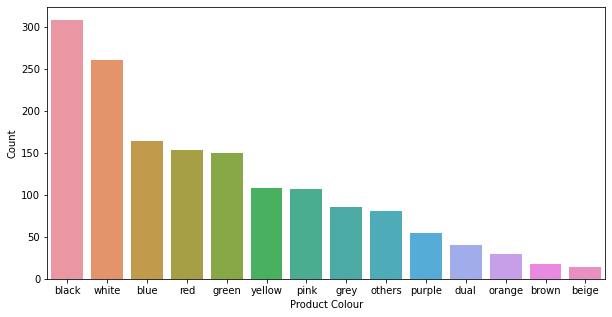

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'product_color', data = sales, order = sales['product_color'].value_counts().iloc[:].index)
plt.xlabel('Product Colour')
plt.ylabel('Count')
plt.show()

#### 2. Product Variation Size ID

* The categories opted are XXXS, XXS, XS, S, M, L, XL, XXL, XXXL, XXXXL, XXXXXL, Others


* All null values will be under the category 'Others'

In [20]:
count = sales['product_variation_size_id'].value_counts()
count[count>3]

S          641
XS         356
M          200
XXS        100
L           49
S.          18
XL          17
XXL         15
XXXS         6
s            5
Size S       5
XS.          5
4XL          5
2XL          4
SIZE XS      4
M.           4
Size-XS      4
Name: product_variation_size_id, dtype: int64

In [21]:
sales['product_variation_size_id'].replace('S.', 'S', inplace=True)
sales['product_variation_size_id'].replace('Size S', 'S', inplace=True)
sales['product_variation_size_id'].replace('XS.', 'XS', inplace=True)
sales['product_variation_size_id'].replace('s', 'S', inplace=True)
sales['product_variation_size_id'].replace('M.', 'M', inplace=True)
sales['product_variation_size_id'].replace('2XL', 'XXL', inplace=True)
sales['product_variation_size_id'].replace('Size XS', 'XS', inplace=True)
sales['product_variation_size_id'].replace('Size-XS', 'XS', inplace=True)
sales['product_variation_size_id'].replace('4XL', 'XXXXL', inplace=True)
sales['product_variation_size_id'].replace('SIZE XS', 'XS', inplace=True)

In [22]:
count = sales['product_variation_size_id'].value_counts()
count[count==3]

SizeL     3
33        3
2pcs      3
Size-S    3
34        3
10 ml     3
Name: product_variation_size_id, dtype: int64

In [23]:
sales['product_variation_size_id'].replace('SizeL', 'L', inplace=True)
sales['product_variation_size_id'].replace('Size-S', 'S', inplace=True)

In [24]:
count = sales['product_variation_size_id'].value_counts()
count[count==2]

1               2
S Pink          2
Size M          2
5XL             2
One Size        2
Size4XL         2
S(bust 88cm)    2
SIZE-XXS        2
size S          2
Size -XXS       2
29              2
Size S.         2
1 pc.           2
Suit-S          2
XXXXXL          2
EU 35           2
3XL             2
35              2
25              2
Name: product_variation_size_id, dtype: int64

In [25]:
sales['product_variation_size_id'].replace('5XL', 'XXXXXL', inplace=True)
sales['product_variation_size_id'].replace('3XL', 'XXXL', inplace=True)
sales['product_variation_size_id'].replace('S(bust 88cm)', 'S', inplace=True)
sales['product_variation_size_id'].replace('Size4XL', 'XXXXL', inplace=True)
sales['product_variation_size_id'].replace('Size -XXS', 'XXS', inplace=True)
sales['product_variation_size_id'].replace('SIZE-XXS', 'XXS', inplace=True)
sales['product_variation_size_id'].replace('Size M', 'M', inplace=True)
sales['product_variation_size_id'].replace('size S', 'S', inplace=True)
sales['product_variation_size_id'].replace('S Pink', 'S', inplace=True)
sales['product_variation_size_id'].replace('Size S.', 'S', inplace=True)
sales['product_variation_size_id'].replace('Suit-S', 'S', inplace=True)

In [26]:
count = sales['product_variation_size_id'].value_counts()
count.count()

84

In [27]:
def size_name(size):
    ls = ["XXXS", "XXS", "XS", "S", "M", "L", "XL", "XXL", "XXXL", "XXXXL", "XXXXXL"]
    if size in ls:
        return size
    return "Others"

In [28]:
sales['product_variation_size_id'].replace(np.nan, 'Others', inplace=True)
sales['product_variation_size_id'] = sales['product_variation_size_id'].apply(size_name)

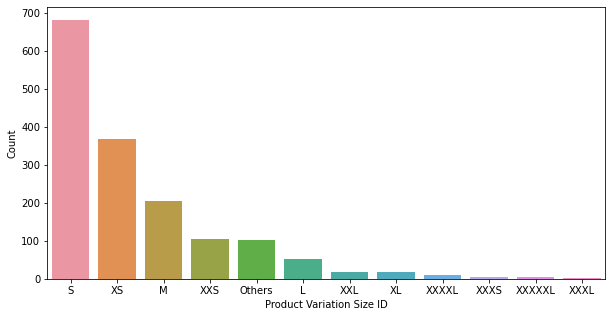

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'product_variation_size_id', data = sales, order = sales['product_variation_size_id'].value_counts().iloc[:].index)
plt.xlabel('Product Variation Size ID')
plt.ylabel('Count')
plt.show()

#### 3. Origin country

* The categories opted are 'CN', 'US' and 'Others'(VE, SG, AT and GB).


* All the null values are categorized under 'Others'

In [30]:
sales['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [31]:
def origin_name(country):
    ls = ["VE", "SG", "GB", "AT"]
    if country in ls:
        return "Others"
    return country

In [32]:
sales['origin_country'].replace(np.nan, "Others", inplace=True)
sales['origin_country'] = sales['origin_country'].apply(origin_name)

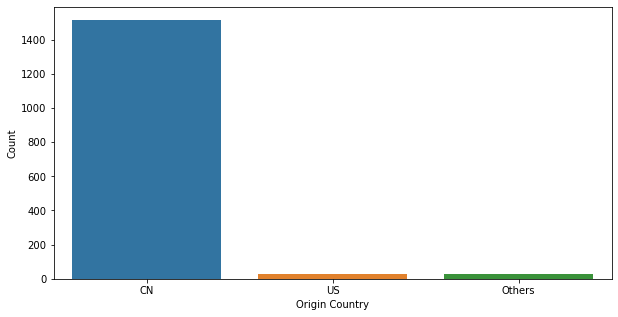

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'origin_country', data = sales, order = sales['origin_country'].value_counts().iloc[:].index)
plt.xlabel('Origin Country')
plt.ylabel('Count')
plt.show()

<a id='3'></a>

### Removing the features that have 1 unique value

* Columns with only 1 unique value will not add value to the model, hence dropping them out.

In [34]:
ls = sales.nunique()
ls[ls==1]

currency_buyer    1
theme             1
crawl_month       1
dtype: int64

In [35]:
sales.drop(labels = ['currency_buyer', 'theme', 'crawl_month'], axis=1, inplace=True)

<a id='4'></a>

### Engineer a new feature

* Importing unique-categories.sorted-by-count.csv that has all the unique categories of tags sorted by count.


* Aim: To find out the percentage of total number of tags available for a particular product. 


* New feature will be 'tags_percentage'.


* More number of tags a product has, the more it will turn up in searches. Hence the probability of its units being sold will be high.


* Dropping the 'tags' feature because it is not needed for the model.

In [36]:
collect_tags = pd.read_csv('unique-categories.sorted-by-count.csv')
print('Total number of tags: ', collect_tags.shape[0])

Total number of tags:  2620


In [37]:
# Return percentage of tags present for a product

def tag_number(tags):
    ls = tags.split(',')
    return len(ls)/collect_tags.shape[0]

In [38]:
sales['tags_percentage'] = sales['tags'].apply(tag_number)

In [39]:
sales.drop(labels = ['tags'], axis=1, inplace=True)

<a id='5'></a>

### Remove unnecessary features

* Columns: title, title_orig, merchant_profile_picture, product_url, product_picture, product_id, merchant_id, merchant_info_subtitle, merchant_name, merchant_title, shipping_option_name, urgency_text


* These will be dropped for now, as the likelihood of these affecting the number of units sold is pretty less. For some of the features present above, a corresponding feature already exists in the dataset that provides more relevant information.


* The rating_count  will also be removed since features of the distribution of rating count across (5/4/3/2/1) gives a more detailed information than 'rating count'

In [40]:
sales.dtypes[sales.dtypes == 'object']

title                        object
title_orig                   object
product_color                object
product_variation_size_id    object
shipping_option_name         object
urgency_text                 object
origin_country               object
merchant_title               object
merchant_name                object
merchant_info_subtitle       object
merchant_id                  object
merchant_profile_picture     object
product_url                  object
product_picture              object
product_id                   object
dtype: object

In [41]:
sales.drop(labels = ['title', 'title_orig', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'merchant_id', 
                     'merchant_info_subtitle', 'merchant_name', 'merchant_title', 'shipping_option_name', 'urgency_text'], 
           axis=1, 
           inplace=True)

In [42]:
sales.drop(labels = ['rating_count'], axis=1, inplace=True)

<a id='correlation'></a>

## Correlation between features

* Checking three categorical variables (product colour, variation size and origin country) of correlation (using the one hot encoded format) with the units sold. 

### 1. Product Color

In [43]:
# product color
dummies_color = pd.get_dummies(sales['product_color'], drop_first=True) # give us the one hot ecoded features
dummies_color.drop(labels = 'others', axis=1, inplace=True) # remove the 'others' feature as n-1 encoded features represents n features

### 2. Product Variation Size ID

In [44]:
# product variation size id
dummies_variation = pd.get_dummies(sales['product_variation_size_id'])
dummies_variation.drop(labels = ['Others'], axis = 1, inplace=True)

### 3. Origin Country

In [45]:
dummies_origin = pd.get_dummies(sales['origin_country'])
dummies_origin.drop(labels=['Others'], axis = 1, inplace=True)

In [46]:
# concatenating all the one hot encoded features for the three categorical variables above

feat_onehot = pd.concat([dummies_color, dummies_variation, dummies_origin, sales['units_sold']], axis=1)
feat_onehot.head(1)

,black,blue,brown,dual,green,grey,orange,pink,purple,red,...,XS,XXL,XXS,XXXL,XXXS,XXXXL,XXXXXL,CN,US,units_sold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,100


In [47]:
feat_onehot_corr = feat_onehot.corr()

feat_onehot_corr['units_sold'].sort_values(ascending=False)

units_sold    1.000000
M             0.107101
S             0.063655
black         0.046767
XL            0.042029
grey          0.041432
purple        0.037679
orange        0.034395
L             0.029851
CN            0.026664
XXXXXL        0.017198
white         0.008433
XXXL          0.003245
green        -0.016570
dual         -0.021030
XXL          -0.024689
XXXXL        -0.024773
XXXS         -0.027051
blue         -0.028643
brown        -0.028790
red          -0.030292
US           -0.044473
pink         -0.046868
yellow       -0.063270
XXS          -0.072489
XS           -0.112293
Name: units_sold, dtype: float64

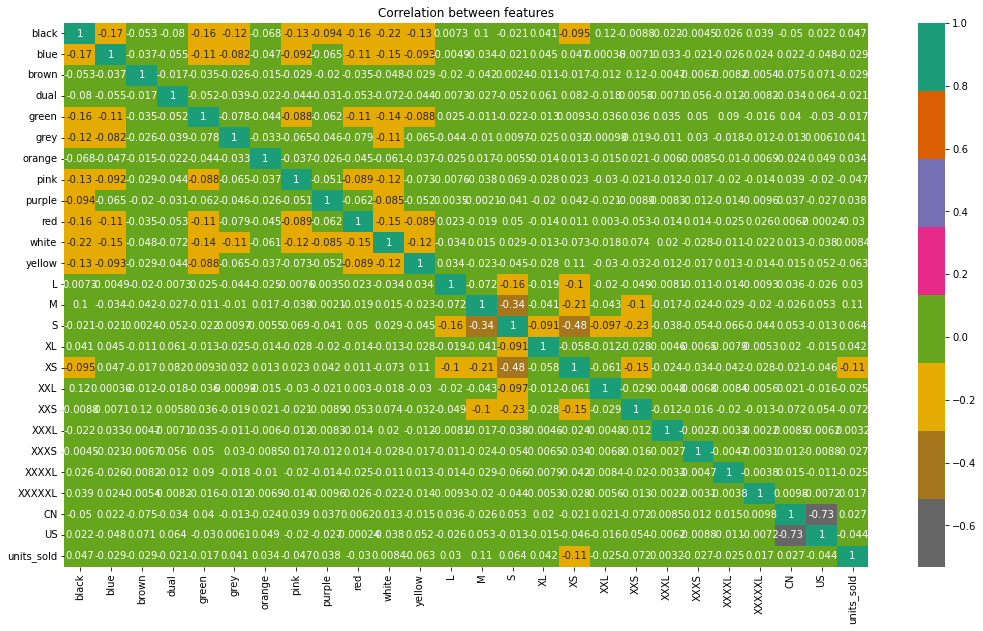

In [48]:
plt.figure(figsize = (18, 10))
sns.heatmap(feat_onehot_corr, annot=True, cmap='Dark2_r')
plt.title('Correlation between features')
plt.show()

* From the above result we can safely say that the dependency of units sold on the product color, variation size or origin country is very unlikely. 


* For the same reason, we will DROP these three features. 

In [49]:
sales.drop(labels = ['product_color', 'product_variation_size_id', 'origin_country'], 
           axis=1, 
           inplace=True)

### Correlation features and units of the product sold

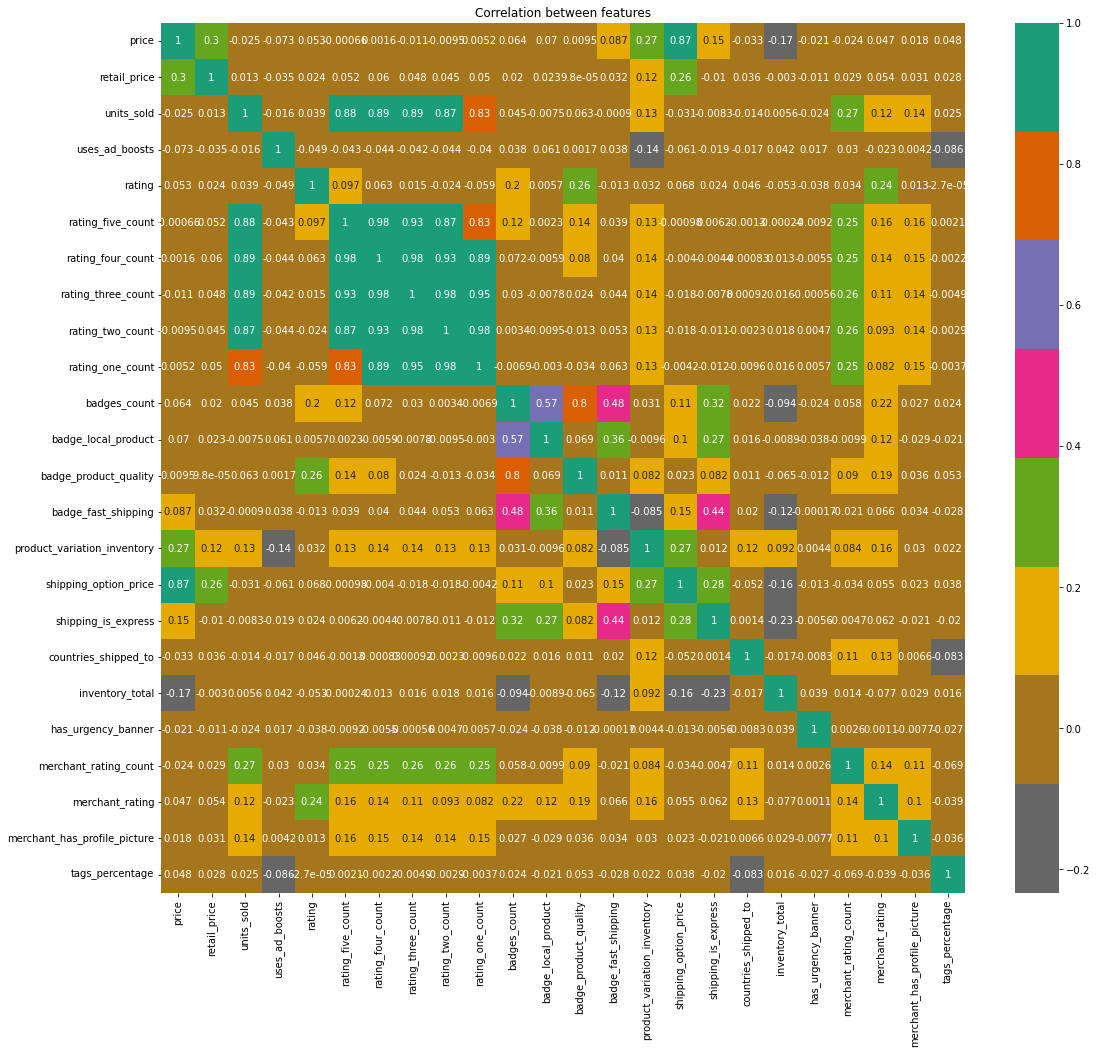

In [50]:
sales_corr = sales.corr()

plt.figure(figsize = (18, 16))
sns.heatmap(sales_corr, annot=True, cmap='Dark2_r')
plt.title('Correlation between features')
plt.show()

In [51]:
sales_corr['units_sold'].sort_values(ascending=False)

units_sold                      1.000000
rating_three_count              0.894835
rating_four_count               0.891761
rating_five_count               0.876972
rating_two_count                0.867406
rating_one_count                0.833807
merchant_rating_count           0.272897
merchant_has_profile_picture    0.143529
product_variation_inventory     0.133846
merchant_rating                 0.122504
badge_product_quality           0.063187
badges_count                    0.045402
rating                          0.039478
tags_percentage                 0.025363
retail_price                    0.012638
inventory_total                 0.005608
badge_fast_shipping            -0.000898
badge_local_product            -0.007544
shipping_is_express            -0.008308
countries_shipped_to           -0.013553
uses_ad_boosts                 -0.016055
has_urgency_banner             -0.023891
price                          -0.024815
shipping_option_price          -0.030987
Name: units_sold

<a id='selection'></a>

## Feature Selection

* Checking above the correlation of all features hold with the units sold. The method for correlation is **pearson**.


#### SelectKBest
* Using the **SelectKBest method** to capture the best features for the model. 


* Selects features according to the k highest scores.



#### Scoring Function: Mutual Info Regression
* Scoring function used here is Mutual Info Regression.


* Mutual Information Regression: Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. It can capture any type of dependency between variables.


* The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances. 
  

In [52]:
# separating the independent and dependent variables

y = sales['units_sold']
X = sales.drop(labels = ['units_sold'], axis = 1)
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

Shape of X is (1573, 23) and that of y is (1573,)


In [53]:
# Splitting the dataset 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (1179, 23)
Shape of test set  (394, 23)


In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

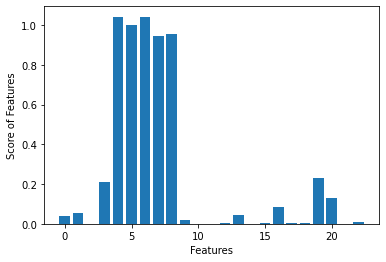

In [55]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.tick_params(color='black', labelcolor='black')
plt.xlabel('Features', color='black')
plt.ylabel('Score of Features', color='black')
plt.show()

In [56]:
# Selecting the best 8 features for model

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k=8)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [57]:
# Selecting features

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

print('Shape of Training set with the best features: ', X_train_fs.shape)

Shape of Training set with the best features:  (1179, 8)


In [58]:
a = fs.get_feature_names_out()

print('Best columns that we are using for our model\n')

for i in a:
    print(i)

Best columns that we are using for our model

rating
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
merchant_rating_count
merchant_rating


<a id='analysis'></a>

## Data Analysis

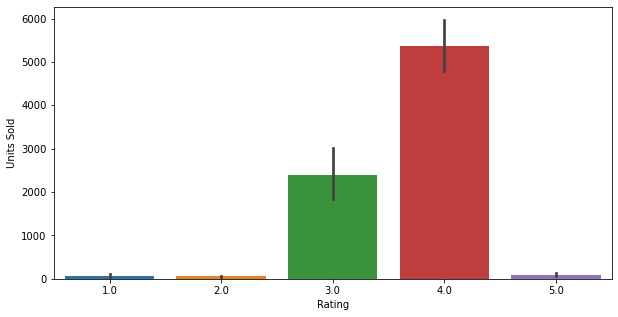

In [59]:
#units_sold Vs rating
plt.figure(figsize=(10,5))
x=round(sales['rating'])
sns.barplot(data=sales, y="units_sold", x=x)
plt.xlabel('Rating')
plt.ylabel('Units Sold')
plt.show()

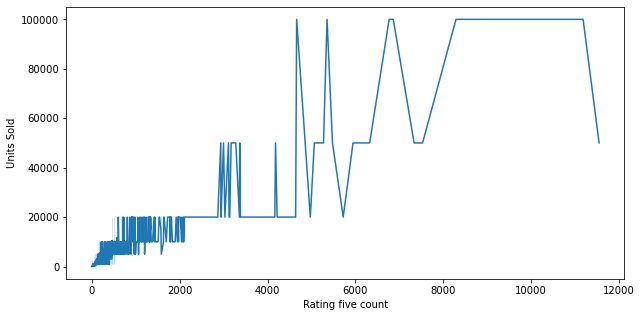

In [60]:
#units_sold Vs rating_five_count
plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="rating_five_count")
plt.xlabel('Rating five count')
plt.ylabel('Units Sold')
plt.show()

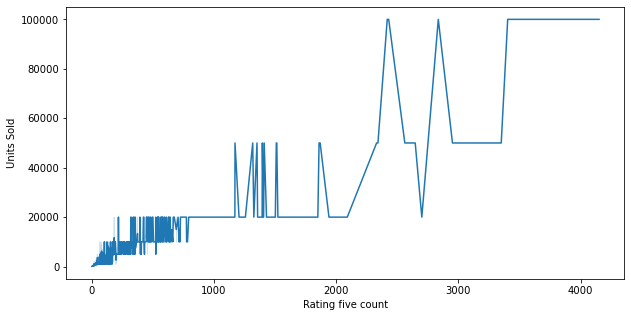

In [61]:
#units_sold Vs rating_four_count
plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="rating_four_count")
plt.xlabel('Rating five count')
plt.ylabel('Units Sold')
plt.show()

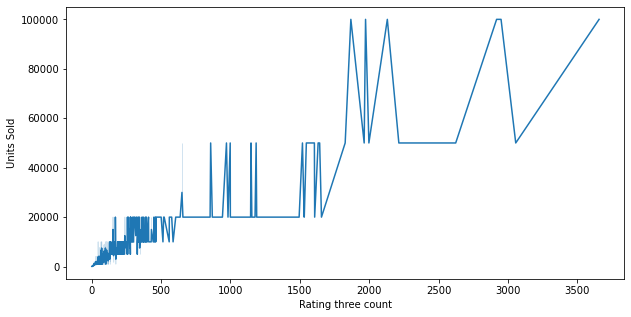

In [62]:
#units_sold Vs rating_three_count
plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="rating_three_count")
plt.xlabel('Rating three count')
plt.ylabel('Units Sold')
plt.show()

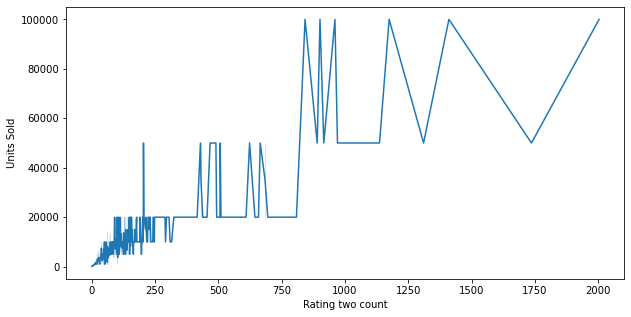

In [63]:
#units_sold Vs rating_two_count
plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="rating_two_count")
plt.xlabel('Rating two count')
plt.ylabel('Units Sold')
plt.show()

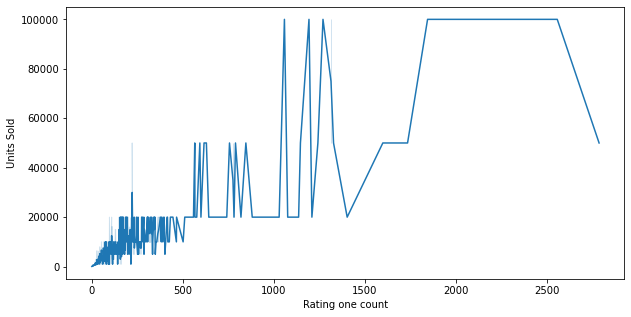

In [64]:
#units_sold Vs rating_two_count
plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="rating_one_count")
plt.xlabel('Rating one count')
plt.ylabel('Units Sold')
plt.show()

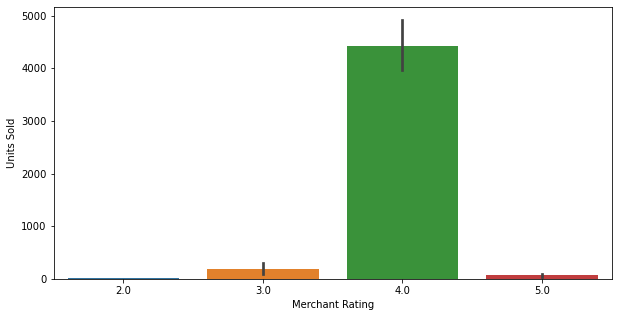

In [65]:
#units_sold Vs merchant_rating
plt.figure(figsize=(10,5))
x=round(sales['merchant_rating'])
sns.barplot(data=sales, y="units_sold", x=x)
plt.xlabel('Merchant Rating')
plt.ylabel('Units Sold')
plt.show()

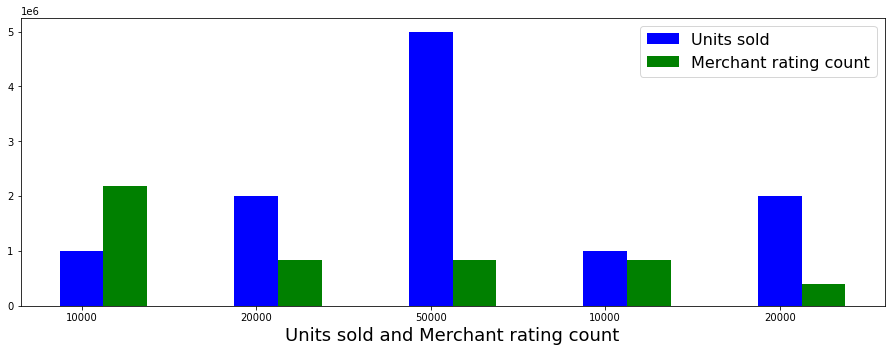

In [66]:
#units_sold Vs merchant_rating_count
df = sales[['units_sold','merchant_rating_count']].sort_values('merchant_rating_count',ascending=False).head(5)
merchant_rating_count_df = [df['units_sold'],df['merchant_rating_count']]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
X = np.arange(5)

ax.bar(X + 0.00, merchant_rating_count_df[0]*100, color = 'b', width = 0.25)
ax.bar(X + 0.25, merchant_rating_count_df[1], color = 'g', width = 0.25)
ax.set_xticks(X)
ax.set_xticklabels(df['units_sold'])
ax.legend(labels=['Units sold', 'Merchant rating count'], fontsize=16)

plt.xlabel("Units sold and Merchant rating count", fontsize=18)
plt.show()

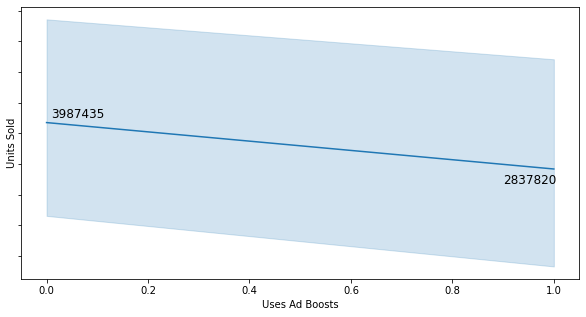

In [67]:
#units_sold Vs uses_ad_boosts
tot_units_sold_with_ad_boosts = sales[['units_sold','uses_ad_boosts']].loc[sales[['units_sold','uses_ad_boosts']].uses_ad_boosts == 1]['units_sold'].sum()
tot_units_sold_without_ad_boosts = sales[['units_sold','uses_ad_boosts']].loc[sales[['units_sold','uses_ad_boosts']].uses_ad_boosts == 0]['units_sold'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="uses_ad_boosts")
plt.xlabel('Uses Ad Boosts')
plt.yticks(visible=False)
plt.ylabel('Units Sold')

plt.text(0.01, 4500, tot_units_sold_without_ad_boosts, fontsize = 12)
plt.text(0.9, 4070, tot_units_sold_with_ad_boosts, fontsize = 12)
plt.show()

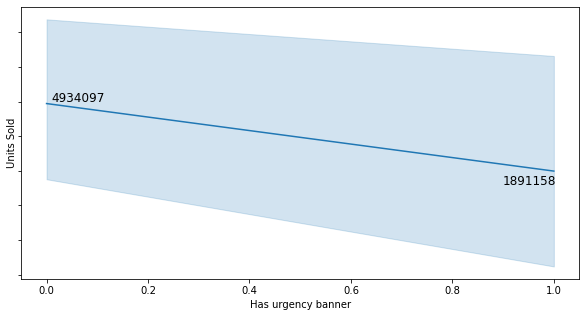

In [68]:
#units_sold Vs has_urgency_banner
tot_units_sold_with_urgency_banner = sales[['units_sold','has_urgency_banner']].loc[sales[['units_sold','has_urgency_banner']].has_urgency_banner == 1]['units_sold'].sum()
tot_units_sold_without_urgency_banner = sales[['units_sold','has_urgency_banner']].loc[sales[['units_sold','has_urgency_banner']].has_urgency_banner == 0]['units_sold'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=sales, y="units_sold", x="has_urgency_banner")
plt.xlabel('Has urgency banner')
plt.yticks(visible=False)
plt.ylabel('Units Sold')

plt.text(0.01, 4500, tot_units_sold_without_urgency_banner, fontsize = 12)
plt.text(0.9, 3900, tot_units_sold_with_urgency_banner, fontsize = 12)
plt.show()

<a id='regmodel'></a>

## Regression Models

1. Linear Regression
2. Polynomial Regression
3. Support Vector Regression
4. Decision Forest Regression
5. Random Forest Regression

In [69]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross validation
from sklearn.model_selection import cross_val_score

In [70]:
regressors = [LinearRegression(),
             DecisionTreeRegressor(random_state=1),
             RandomForestRegressor(n_estimators = 10, random_state=1)]

df = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 
                             'Cross Validation Score (Mean Accuracy)', 'R2 Score'])

In [71]:
for regressor in regressors:
    regressor.fit(X_train_fs, y_train)
    y_pred = regressor.predict(X_test_fs)
    
    # print classifier name
    s = str(type(regressor)).split('.')[-1][:-2]
    
    # Train Score
    train = regressor.score(X_train_fs, y_train)
    
    # Test Score
    test = regressor.score(X_test_fs, y_test)
    
    # MAE score
    mae = mean_absolute_error(y_test, y_pred)
    
    # MSE Score
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10)
    cv = accuracy.mean()*100
    
    r2 = r2_score(y_test, y_pred)
    
    df = df.append({'Name': s, 'Train Score': train, 'Test Score': test, 'Mean Absolute Error': mae, 
                    'Mean Squared Error': mse, 'Cross Validation Score (Mean Accuracy)': cv,
                   'R2 Score': r2},
                  ignore_index=True)

In [72]:
df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.815661,0.828781,1588.205844,8891266.650267,71.955947,0.828781
1,DecisionTreeRegressor,1.0,0.479628,1529.406091,27022509.482234,64.775637,0.479628
2,RandomForestRegressor,0.974564,0.824763,1311.001523,9099893.234416,74.832188,0.824763


In [73]:
# Making Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
X_train_poly = poly_reg.fit_transform(X_train_fs)
X_test_poly = poly_reg.fit_transform(X_test_fs)

# Fitt PolyReg to training set
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_poly)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2] + ' (Poly)', 
                'Train Score': regressor.score(X_train_poly, y_train), 
                'Test Score': regressor.score(X_test_poly, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

In [74]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Applying feature scaling for this
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_fs)
X_test_sc = sc.fit_transform(X_test_fs)

regressor = SVR(kernel='rbf')
regressor.fit(X_train_sc, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_sc)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2], 
                'Train Score': regressor.score(X_train_sc, y_train), 
                'Test Score': regressor.score(X_test_sc, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_sc, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

In [75]:
df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.815661,0.828781,1588.205844,8891266.650267,71.955947,0.828781
1,DecisionTreeRegressor,1.0,0.479628,1529.406091,27022509.482234,64.775637,0.479628
2,RandomForestRegressor,0.974564,0.824763,1311.001523,9099893.234416,74.832188,0.824763
3,LinearRegression (Poly),0.940897,-3.176442,3882.206638,216879158.125377,71.955947,-3.176442
4,SVR,-0.117289,-0.14827,3639.465606,59628687.558016,-14.70638,-0.14827


<a id='gridsearch'></a>

## GridSearchCV

* Performing GridSearch on Random Forest Regression that has already given best results.

In [76]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(random_state=1)

param_grid = { 
    'n_estimators': np.arange(4, 30, 2),
    'max_depth' : [4,5,6,7,8],
}

In [77]:
CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV_reg.fit(X_train_fs, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])})

In [78]:
CV_reg.best_params_

{'max_depth': 4, 'n_estimators': 18}

We will now check the results from the regressor with the best results.

In [79]:
regressor = RandomForestRegressor(n_estimators=18, random_state=1, max_depth=4)

regressor.fit(X_train_fs, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_fs)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2] + ' (after GridSearchCV)', 
                'Train Score': regressor.score(X_train_fs, y_train), 
                'Test Score': regressor.score(X_test_fs, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

<a id='finalmodel'></a>

## Final Model: Model Boosting

**MODEL BOOSTING:** Using VotingRegressor to boost our results. 

A **voting regressor** is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. 

The voting regressor uses *linear regressor* and the best possible *random forest regressor* to give predictions.

In [80]:
from sklearn.ensemble import VotingRegressor

regressor = VotingRegressor([('lr',LinearRegression()), ('rf', RandomForestRegressor(n_estimators=18, random_state=1, max_depth=4))])

regressor.fit(X_train_fs, y_train)

# Predicting test values
y_pred = regressor.predict(X_test_fs)

df = df.append({'Name': str(type(regressor)).split('.')[-1][:-2], 
                'Train Score': regressor.score(X_train_fs, y_train), 
                'Test Score': regressor.score(X_test_fs, y_test), 
                'Mean Absolute Error': mean_absolute_error(y_test, y_pred), 
                'Mean Squared Error': mean_squared_error(y_test, y_pred), 
                'Cross Validation Score (Mean Accuracy)': cross_val_score(estimator = regressor, X = X_train_fs, y = y_train, cv=10).mean()*100,
                'R2 Score': r2_score(y_test, y_pred)},
                  ignore_index=True)

In [81]:
df

,Name,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Cross Validation Score (Mean Accuracy),R2 Score
0,LinearRegression,0.815661,0.828781,1588.205844,8891266.650267,71.955947,0.828781
1,DecisionTreeRegressor,1.0,0.479628,1529.406091,27022509.482234,64.775637,0.479628
2,RandomForestRegressor,0.974564,0.824763,1311.001523,9099893.234416,74.832188,0.824763
3,LinearRegression (Poly),0.940897,-3.176442,3882.206638,216879158.125377,71.955947,-3.176442
4,SVR,-0.117289,-0.14827,3639.465606,59628687.558016,-14.70638,-0.14827
5,RandomForestRegressor (after GridSearchCV),0.922982,0.769997,1385.861089,11943857.43647,76.956616,0.769997
6,VotingRegressor,0.888813,0.828968,1451.062478,8881543.623321,77.168112,0.828968


The specifications of the most optimum model:

**Voting Regressor:**
1. Linear Regressor
2. Random Forest Regressor (n_estimators=18, max_depth=4)

**with results:**
* Train Score: 0.88
* Test Score: 0.83
* MAE: 1451.06
* MSE: 8.88e+06
* CV Score (Mean Accuracy): 77.16
* R2 Score: 0.83

<a id='testing'></a>

## Prediction Testing

In [82]:
X_test.loc[[108], ['rating',
'rating_five_count',
'rating_four_count',
'rating_three_count',
'rating_two_count',
'rating_one_count',
'merchant_rating_count',
'merchant_rating']]

,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,merchant_rating_count,merchant_rating
108,4.2,66.0,13.0,18.0,3.0,7.0,247,3.94332


In [83]:
prediction = regressor.predict([[4.2,66.0,13.0,18.0,3.0,7.0, 247.0,3.94331984]])
print(round(prediction[0]))

1162


Alghorithm predicted that **1161** units sold when the 

* Rating is 4.2
* Rating five count is 66
* Rating four count is 13
* Rating three count is 18
* Rating two count is 3
* Rating one count is 7
* Merchant rating count is 247
* Merchant rating is 3.9433

In [84]:
y_test_df = y_test.to_frame().reset_index()
y_test_df.loc[y_test_df.index == 108]

,index,units_sold
108,1032,1000


As per the data, the units sold is 1000 which is close.